# Analyzing Depression, Anxiety, and Stress Predictions

This notebook contains analysis into user filled data on a survey designed to indicate whether an individual is pontentially at risk for depression, anxiety, or stress.

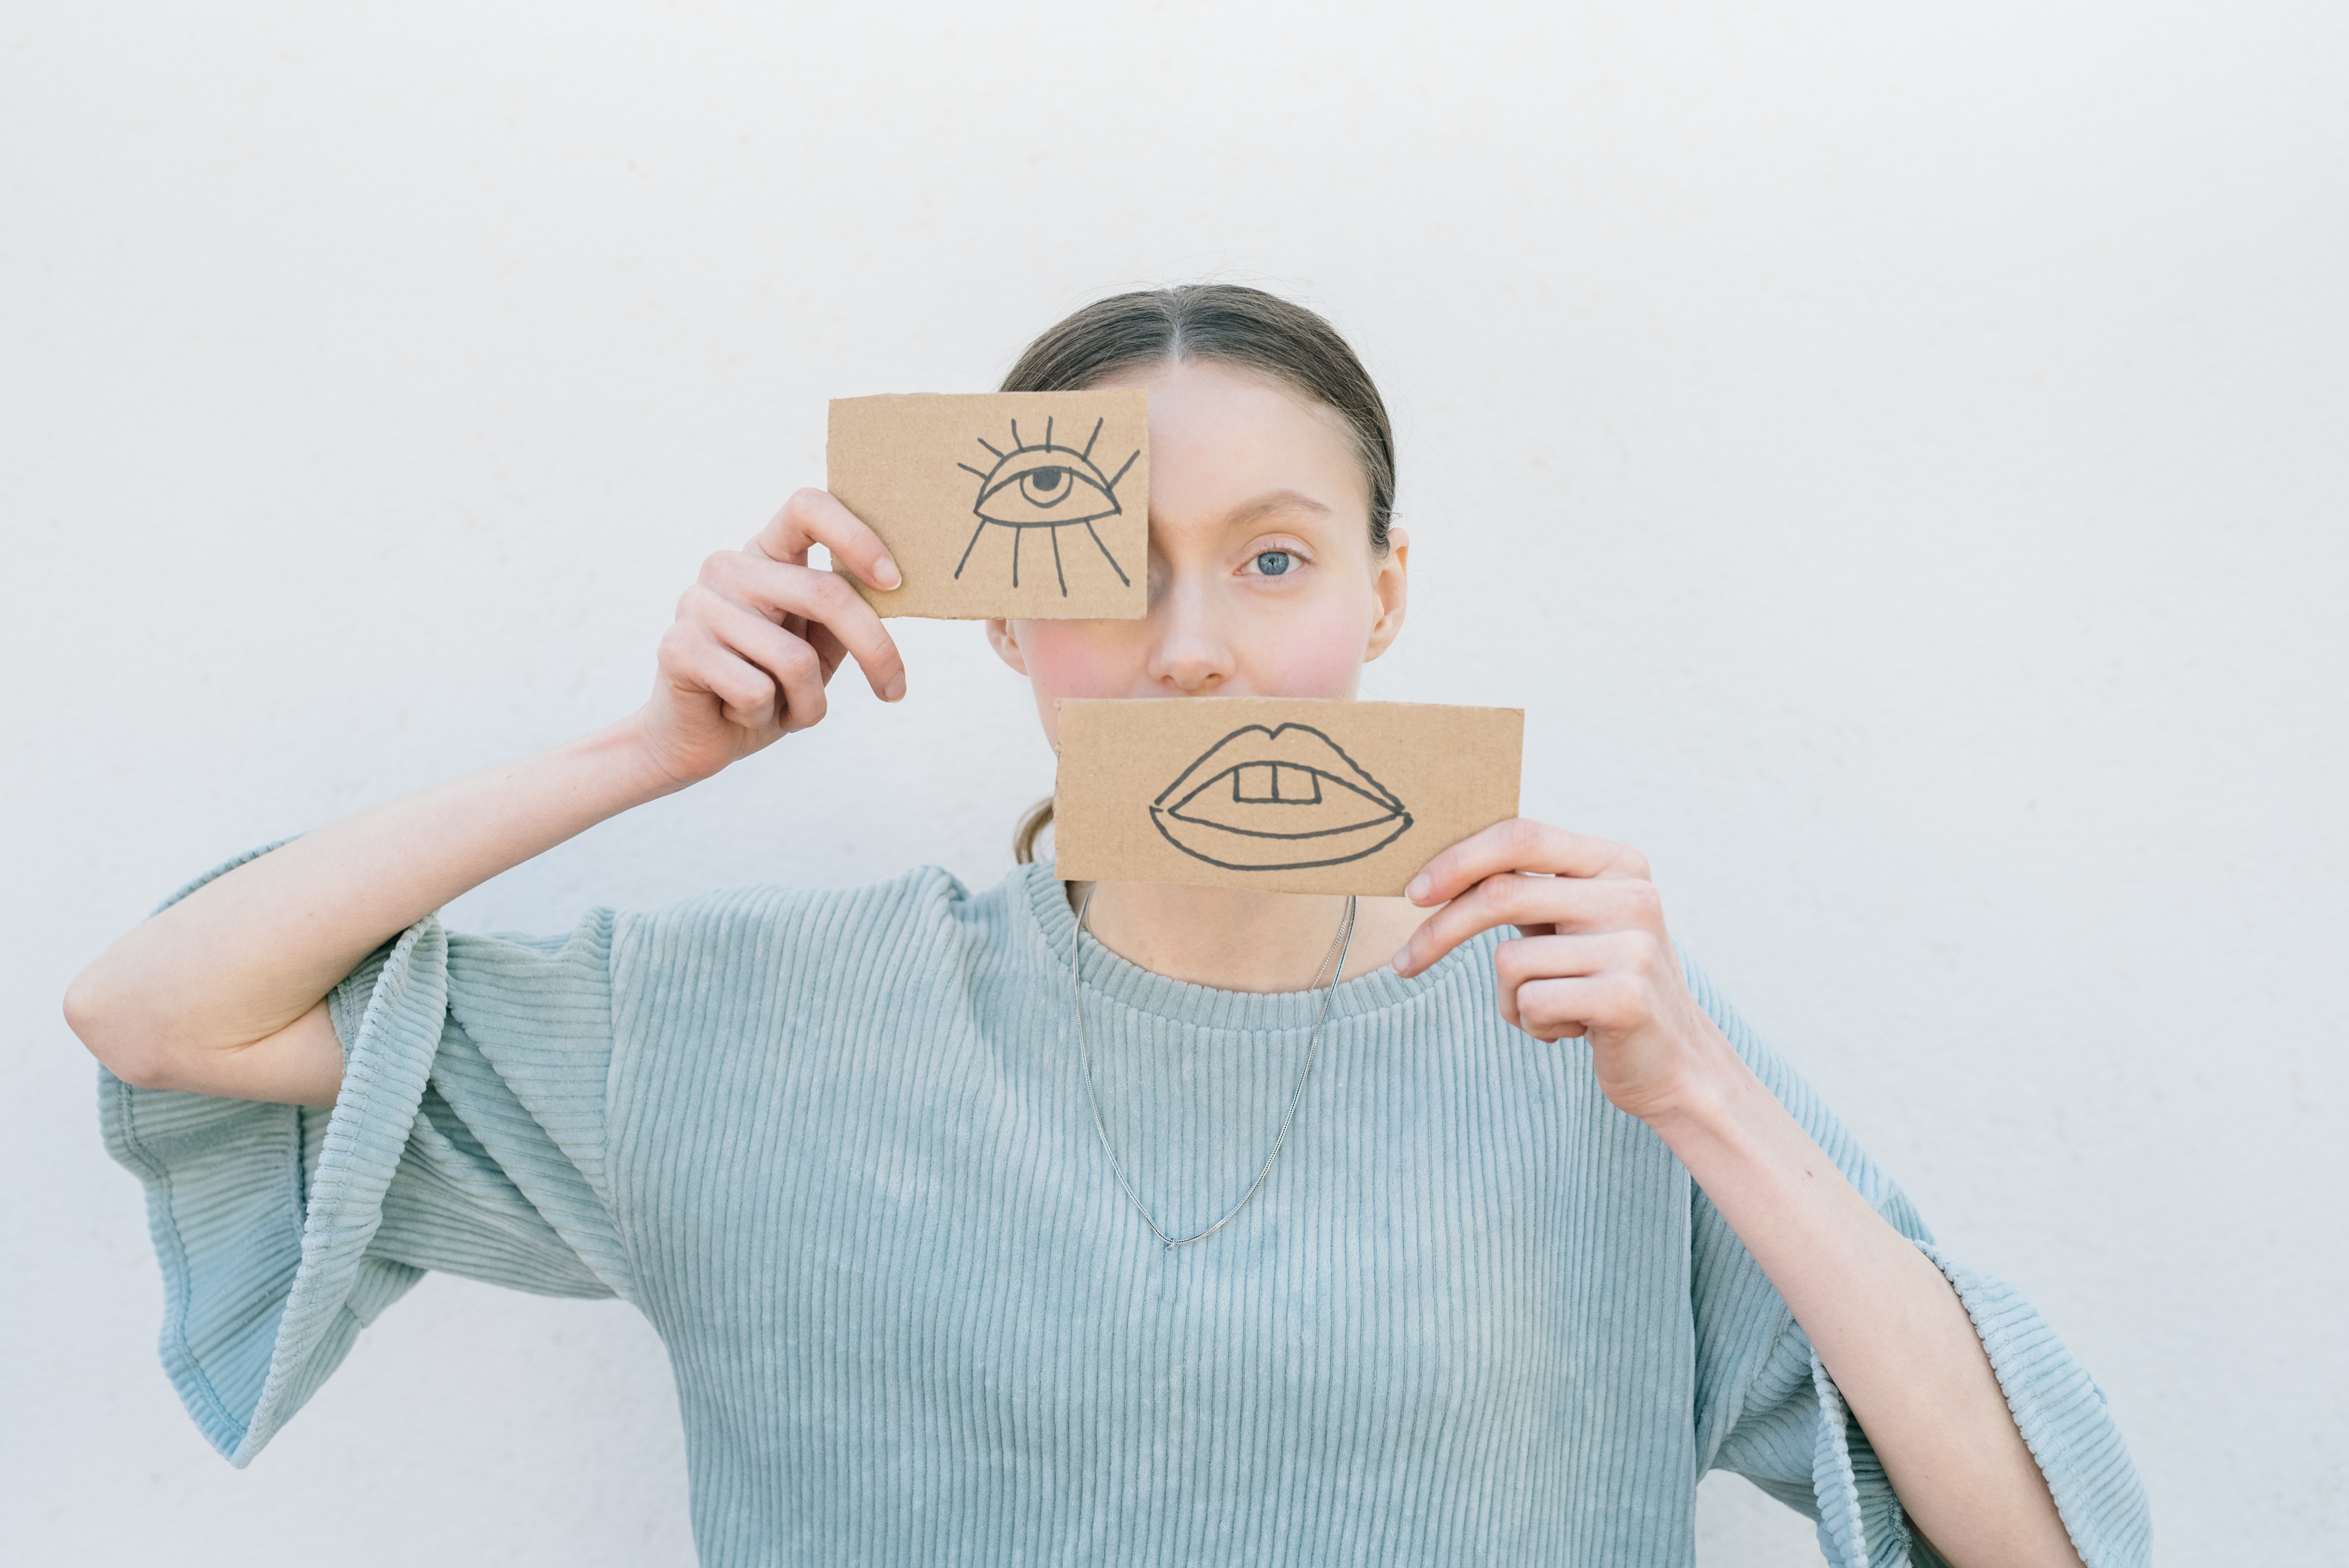

Image by [Olya Kobruseva](https://www.pexels.com/@olyakobruseva) from [Pexels](https://www.pexels.com/)

## Import Statements

In [1]:
import pandas as pd
import numpy as np
#import itertools
#import datetime

import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots

import pickle
from basic_functions import *
#import requests

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)

## Data Import

First, the initial data read-in.

In [2]:
df = pd.read_csv('data/data.csv', sep = '\t')
df

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,...,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,...,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,...,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,...,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,...,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,...,1950,3,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,31,3287,1,5,2216,3,29,3895,2,37,2767,3,39,1745,2,4,6424,1,36,3737,3,24,1977,1,18,4089,4,34,1816,2,26,1928,2,17,3159,4,32,2768,2,22,5785,1,25,3969,3,41,2113,4,27,...,1792,3,16,2969,GB,2,7,143,66,2,2,3,5,6,5,5,3,3,6,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2,2,1,1,16,2,1,1,2,4,60,2,1,2,NaN
39771,3,14,4792,4,41,2604,3,15,2668,4,33,4609,3,17,2434,4,26,2503,4,34,2598,4,11,2133,3,13,10455,4,37,3251,4,18,2332,4,28,2406,4,5,3912,4,2,7770,4,12,3637,4,30,2633,3,20,...,5300,4,35,1967,MY,1,10,181,243,4,5,5,7,4,6,4,7,4,4,1,1,0,1,1,0,0,0,0,1,0,1,0,1,1,1,3,2,1,2,21,1,1,1,10,0,10,2,1,4,Mathematic
39772,2,1,25147,1,4,4555,2,14,3388,1,27,2753,1,6,5455,1,41,4938,1,24,3738,1,40,3820,2,28,10008,1,38,3670,1,5,9493,1,22,7407,2,2,13180,1,3,17016,1,36,2686,1,34,3370,1,35,...,3470,1,31,4607,US,0,12,246,257,6,6,7,5,6,3,6,1,5,4,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,1,3,2,2,1,48,2,1,1,7,1,30,1,2,3,Computer Science
39773,3,36,4286,1,34,2736,2,10,5968,2,20,5655,3,9,2296,3,16,2627,3,32,3143,4,2,3164,3,19,5568,1,41,2324,3,39,2766,3,26,2852,4,42,2121,4,27,3097,1,6,3663,1,24,11004,2,38,...,1865,3,13,4647,US,2,2,174,113,1,6,5,7,3,5,3,5,3,4,1,1,1,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,1,20,2,1,1,6,1,60,1,1,2,History


After the import I check the data types. The primary item I am checking on is whether all the values for the questions are integer values. These would be the user's answer to each question, the length of time they spent on the question, as well as the questions order of appearance on the survey.

In [23]:
df.dtypes

Q1A                       int64
Q1I                       int64
Q1E                       int64
Q2A                       int64
Q2I                       int64
Q2E                       int64
Q3A                       int64
Q3I                       int64
Q3E                       int64
Q4A                       int64
Q4I                       int64
Q4E                       int64
Q5A                       int64
Q5I                       int64
Q5E                       int64
Q6A                       int64
Q6I                       int64
Q6E                       int64
Q7A                       int64
Q7I                       int64
Q7E                       int64
Q8A                       int64
Q8I                       int64
Q8E                       int64
Q9A                       int64
Q9I                       int64
Q9E                       int64
Q10A                      int64
Q10I                      int64
Q10E                      int64
Q11A                      int64
Q11I    

I also check for any null values.

In [31]:
df.isna().sum()

Q1A                          0
Q1I                          0
Q1E                          0
Q2A                          0
Q2I                          0
Q2E                          0
Q3A                          0
Q3I                          0
Q3E                          0
Q4A                          0
Q4I                          0
Q4E                          0
Q5A                          0
Q5I                          0
Q5E                          0
Q6A                          0
Q6I                          0
Q6E                          0
Q7A                          0
Q7I                          0
Q7E                          0
Q8A                          0
Q8I                          0
Q8E                          0
Q9A                          0
Q9I                          0
Q9E                          0
Q10A                         0
Q10I                         0
Q10E                         0
Q11A                         0
Q11I                         0
Q11E    

This data only contains null values in the "major" column but had it contained more, it would give me an idea of what to look out for as I moved forward.

# Visualizations

One of the first items that I am curious of is whether a particular question took survey takers longer to answer. This is what I look for in the following cells.

In [3]:
#Create a list of only the columns associated with question answer times
timer_columns = [x for x in df.columns.tolist() if x.endswith('E')]
timer_columns

['Q1E',
 'Q2E',
 'Q3E',
 'Q4E',
 'Q5E',
 'Q6E',
 'Q7E',
 'Q8E',
 'Q9E',
 'Q10E',
 'Q11E',
 'Q12E',
 'Q13E',
 'Q14E',
 'Q15E',
 'Q16E',
 'Q17E',
 'Q18E',
 'Q19E',
 'Q20E',
 'Q21E',
 'Q22E',
 'Q23E',
 'Q24E',
 'Q25E',
 'Q26E',
 'Q27E',
 'Q28E',
 'Q29E',
 'Q30E',
 'Q31E',
 'Q32E',
 'Q33E',
 'Q34E',
 'Q35E',
 'Q36E',
 'Q37E',
 'Q38E',
 'Q39E',
 'Q40E',
 'Q41E',
 'Q42E']

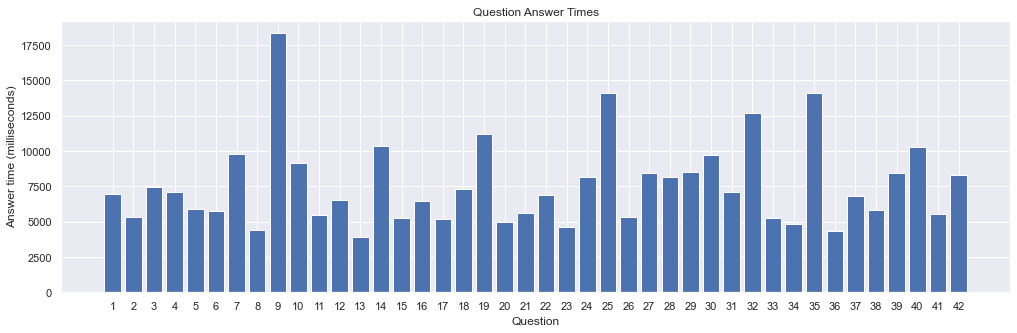

In [6]:
#Set seaborn as default style
sns.set()
fig, ax = plt.subplots(figsize = (17,5))

ax.bar(x = timer_columns,
       height = df[timer_columns].mean()
)

#Create a list of just question numbers for the xticks
answer_times_xticks = [x[1:-1] for x in timer_columns]
#Rename x ticks for readability
ax.set_xticklabels(answer_times_xticks)

ax.set_title('Question Answer Times')
ax.set_xlabel('Question')
ax.set_ylabel('Answer time (milliseconds)');

From this graph alone, I notice that question nine has taken the longest time.

Using a function to pull the key's corresponding question string, I view the question.

In [5]:
survey_key('Q9')

'I found myself in situations that made me so anxious I was most relieved when they ended.'

This result alone is interesting. However, I do want to view the standard deviation for that question. This is to eliminate the potential that one or a few individuals took an unnaturally long time to answer the question and thus, raised the mean.

In [48]:
df['Q9E'].describe()

count    3.977500e+04
mean     1.833083e+04
std      1.409724e+06
min      1.770000e+02
25%      4.218000e+03
50%      6.139000e+03
75%      9.245000e+03
max      2.797722e+08
Name: Q9E, dtype: float64

Seeing this result alone does not show me as much as I would like and thus, I graph the standard deviation per column as well.

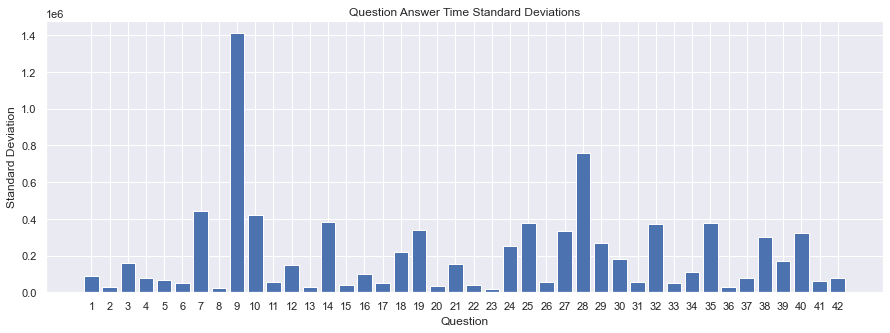

In [7]:
#Set seaborn as default style
sns.set()
fig, ax = plt.subplots(figsize = (15,5))

ax.bar(x = timer_columns,
       height = df[timer_columns].std()
)

ax.set_xticklabels(answer_times_xticks)

ax.set_title('Question Answer Time Standard Deviations')
ax.set_xlabel('Question')
ax.set_ylabel('Standard Deviation');

From this graph, it becomes evident that question 9 has an unnaturally long standard deviation.

In other words, there was a large variation in time that user took to answer this question. This opens up the possibility that an individual, or mutliple, simply left it open which lent to a longer than normal mean for the time it took to answer this question.